In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from time import sleep

In [2]:
headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': 'Custom User Agent 1.0',
        'From': 'nsrivast@iitk.ac.in'  # Stick in your IITK email id
    }
)

In [3]:
url = 'https://en.wikipedia.org/wiki/Indian_states_ranking_by_fertility_rate'
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'lxml')

In [5]:
all_tables = soup.find_all(class_='wikitable sortable') # collect all table objects from the marked up soup container

In [13]:
s_name = []
s_tfr_new = []
s_tfr_old = []
state_list = all_tables[0]('tr')[1:]
for state in state_list:
    s_name.append(str(state('td')[1].text))
    if(len(state('td')[2].text)>1):
        s_tfr_new.append(float(state('td')[2].text))
    else:
        s_tfr_new.append(2.23)
    if(len(state('td')[5].text)>1):
        s_tfr_old.append(float(state('td')[5].text))
    else:
        s_tfr_old.append(2.94)    

In [16]:
import numpy as np
np.subtract(s_tfr_old, s_tfr_new)

array([ 0.8 ,  0.71,  0.08,  0.65,  0.77,  0.12,  0.65,  0.81,  1.21,
        0.91,  0.18,  1.17,  0.44,  0.62,  1.01,  0.54,  0.23,  0.32,
        0.39,  0.73,  0.51,  0.79,  0.85,  0.76,  0.75,  1.11,  0.71,
        1.39,  0.24,  0.85,  1.3 ,  0.9 ,  0.34,  0.24,  1.65,  1.04,  1.18])

In [65]:
df_tfr = pd.DataFrame()
df_tfr['state'] = s_name
df_tfr['d_tfr'] = np.subtract(s_tfr_old, s_tfr_new)

In [17]:
url = 'http://niti.gov.in/content/capita-nsdp-current-prices-percent-growth-2004-05-2014-15'
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'lxml')

In [19]:
all_tables = soup.find_all('table')

In [62]:
s_name_gdp = []
s_gdp_rate = []
import numpy as np
state_list = all_tables[0]('tr')[2:]
for state in state_list:
    for year in state('td')[2:]:
        try:
            list += float(year.text)
        except:
            list += list/9        
    list = list/10.0;
    try:
        s_name_gdp.append(str(state('td')[1].text))
        s_gdp_rate.append(list)
    except:
        print('hi')
        


hi


In [88]:
df_gdp = pd.DataFrame()
df_gdp['state'] = s_name_gdp
df_gdp['d_gdp'] = s_gdp_rate

In [39]:
for year in state_list[0]('td')[2:]:
    list += float(year.text)

In [69]:
df_lit = pd.read_csv('literacy change.csv')

In [72]:
df_literacy = pd.DataFrame()
df_literacy['state'] = df_lit['state']
df_literacy['literacy'] = df_lit.new - df_lit.old

In [73]:
url = 'https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population'
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'lxml')

In [74]:
all_tables = soup.find_all(class_='wikitable sortable') # collect all table objects from the marked up soup container

In [82]:
s_name = []
s_pop_rate = []
state_list = all_tables[0]('tr')[1:]
for state in state_list:
    s_name.append(str(state('td')[1].text))
    if(len(state('td')[2].text)>1):
        s_pop_rate.append(float(state('td')[3].text[0:len(state('td')[3].text)-1]))
    else:
        s_pop_rate.append(0)    

In [83]:
df_pop = pd.DataFrame()
df_pop['state'] = s_name
df_pop['d_pop'] = s_pop_rate

In [84]:
url = 'https://en.wikipedia.org/wiki/Indian_states_ranking_by_television_ownership'
r = requests.get(url, headers=headers)
soup = BeautifulSoup(r.text, 'lxml')
all_tables = soup.find_all(class_='wikitable sortable') # collect all table objects from the marked up soup container

In [102]:
s_name_tv = []
s_tv_old = []
s_tv_new = []
state_list = all_tables[0]('tr')[1:]
for state in state_list:
    s_name_tv.append(str(state('td')[0].text))
    try:
        s_tv_new.append(float(state('td')[1].text) - float(state('td')[2].text))
    except:
        print('hi')

In [103]:
df_tv = pd.DataFrame()
df_tv['state'] = s_name_tv
df_tv['d_tv'] = s_tv_new

In [98]:
state('td')[2]

<td>9.1</td>

In [112]:
dfm = df_tfr.merge(df_gdp,on='state').merge(df_pop,on='state').merge(df_literacy,on='state').merge(df_tv,on='state')

In [113]:
dfm.to_csv('tplus_data.csv')

In [140]:
mtrx = dfm.corr()

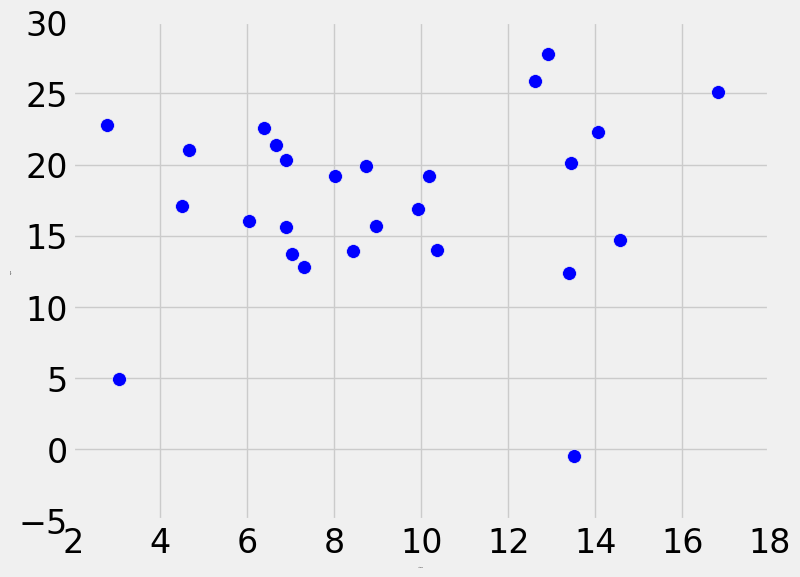

In [162]:
plt.style.use('fivethirtyeight')     # you can use preloaded style sheets to make prettier figures in matplotlib
plt.figure(figsize=(20, 20))
plt.rcParams.update({'font.size': 1})
plt.rc('xtick', labelsize=24) 
plt.rc('ytick', labelsize=24) 

dfm.plot(x='d_pop',y='d_tfr', kind='scatter', s=100)
#plt.show()
plt.savefig('literacy.pdf', bbox_inches='tight')

In [141]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']
